### Import necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
import math
from scipy import stats

# Part 1 – Clicked items investigation



In [0]:
raw_data_part1 = pd.read_csv('tr_data_analysis_case_study_part1.csv')

In [0]:
raw_data_part1.describe()

,item_id,impressions,clicks,avg_impressed_position,num_users,num_sessions
count,1.300560e+05,130056.000000,130056.000000,130056.000000,130056.000000,130056.000000
mean,1.975953e+06,278.031648,12.897452,11.223035,167.495417,185.832072
std,1.879174e+06,830.236049,52.592582,4.086324,493.278475,556.626846
min,5.001000e+03,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.501388e+05,15.000000,1.000000,8.860000,8.000000,9.000000
50%,1.433822e+06,55.000000,2.000000,11.750000,32.000000,35.000000
75%,3.135273e+06,205.000000,7.000000,14.030000,122.000000,134.000000
max,7.174984e+06,38569.000000,2865.000000,24.000000,22576.000000,25987.000000


In [0]:
raw_data_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130056 entries, 0 to 130055
Data columns (total 7 columns):
item_id                        130056 non-null int64
impressions                    130056 non-null int64
clicks                         130056 non-null int64
clicked_displayed_positions    130056 non-null object
avg_impressed_position         130056 non-null float64
num_users                      130056 non-null int64
num_sessions                   130056 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 6.9+ MB


In [0]:
raw_data_part1.head()

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions
0,5040,40,5,20;9;12;10;12,11.83,22,23
1,5053,83,3,2;3;0,7.88,43,52
2,5094,54,6,0;0;0;2;1;2,4.72,30,36
3,5101,30,2,5;3,4.97,17,20
4,5105,24,1,18,9.08,8,11


#### Now we make a copy of raw data to run our manipulations on 

In [0]:
raw_data_part1_copy=raw_data_part1.copy()

#### making sure that each item is unique

In [0]:
raw_data_part1_copy['item_id'].drop_duplicates().count()

130056

### first we need to clean data making it tidy (i.e each row is about a case and each column is about a variable  ) which is already achieved 

### we need to check that each column is stored in the correct data type

### then we need to fix errors in the data

### we have a column of clicked positions for each item (clicked_displayed_positions)

### we first split it transferring  it to a list 

In [0]:
raw_data_part1_copy['c_positions_list']=raw_data_part1_copy['clicked_displayed_positions'].str.split(';')

In [0]:
raw_data_part1_copy.loc[:,['clicks','c_positions_list']].set_index(raw_data_part1_copy['item_id']).head(10)

,clicks,c_positions_list
item_id,,
5040,5,"[20, 9, 12, 10, 12]"
5053,3,"[2, 3, 0]"
5094,6,"[0, 0, 0, 2, 1, 2]"
5101,2,"[5, 3]"
5105,1,[18]
5115,2,"[3, 6]"
5121,7,"[3, 1, -11, 8, -11, 8, 0]"
5130,8,"[0, 3, 1, 3, 3, 8, 1, 0]"
5147,4,"[0, 3, 14, 6]"


#### Here we notice that positions, despite integers , they are written in data as strings 

### this needs to be fixed

#### also we notice some negative values for positions , which we can consider as outliers so we need to correct them, we can consider the absolute value as a correction

#### Another importent issue, we have 0 denotes the first position , 1 denotes the second position and so on, since we will need to calculate average clicked  position, this will lead to mis-calculation

#### in the following loop we fix these  issues 

In [0]:
a=[]
for b in raw_data_part1_copy['c_positions_list']:
  f=[]
  for i in b:
      j=int(i)
      h=abs(j)+1
      f.append(h)
  a.append(f)

  


In [0]:
a[0:10]

[[21, 10, 13, 11, 13],
 [3, 4, 1],
 [1, 1, 1, 3, 2, 3],
 [6, 4],
 [19],
 [4, 7],
 [4, 2, 12, 9, 12, 9, 1],
 [1, 4, 2, 4, 4, 9, 2, 1],
 [1, 4, 15, 7],
 [11]]

#### then we merge the clean 'c_positions_list' column into the data

In [0]:
 raw_data_part1_copy['c_positions_list_correct']=a

### just we make sure that the new column 'c_positions_list_correct' contains positions correct and on the right format (integers not strings)

In [0]:
raw_data_part1_copy.loc[:,['clicks','c_positions_list','c_positions_list_correct']].set_index(raw_data_part1_copy['item_id']).head(10)

,clicks,c_positions_list,c_positions_list_correct
item_id,,,
5040,5,"[20, 9, 12, 10, 12]","[21, 10, 13, 11, 13]"
5053,3,"[2, 3, 0]","[3, 4, 1]"
5094,6,"[0, 0, 0, 2, 1, 2]","[1, 1, 1, 3, 2, 3]"
5101,2,"[5, 3]","[6, 4]"
5105,1,[18],[19]
5115,2,"[3, 6]","[4, 7]"
5121,7,"[3, 1, -11, 8, -11, 8, 0]","[4, 2, 12, 9, 12, 9, 1]"
5130,8,"[0, 3, 1, 3, 3, 8, 1, 0]","[1, 4, 2, 4, 4, 9, 2, 1]"
5147,4,"[0, 3, 14, 6]","[1, 4, 15, 7]"


#### Dropping 'clicked_displayed_positions' and 'c_positions_list' since they are not needed now, we drop them for better performance

In [0]:
raw_data_part1_copy=raw_data_part1_copy.drop(columns=['c_positions_list','clicked_displayed_positions'])

#### after cleaning Data , let's Answer the questions

## Q1 : Calculate the CTR of each item. What is the overall avg CTR?

### Average click through rate can be described as the ratio of ad clicks to impressions

In [0]:
raw_data_part1_copy['CTR']=np.round((raw_data_part1_copy['clicks']*100/raw_data_part1_copy['impressions']),2)

In [0]:
raw_data_part1_copy.set_index(raw_data_part1_copy['item_id'])['CTR'].head(10)

item_id
5040    12.50
5053     3.61
5094    11.11
5101     6.67
5105     4.17
5115     3.03
5121     5.65
5130     8.08
5147    10.81
5148     4.00
Name: CTR, dtype: float64

In [0]:
np.round(raw_data_part1_copy['CTR'].mean(),2)

11.46

## Q2 :What is the distribution of clicks among the top 25 positions? What is the share of the first positions? On how many positions are approx. Half of the click-outs made?

### let's explore how to check clicks' distribution between positions for each hotel

In [0]:
raw_data_part1_copy.loc[:,['clicks','c_positions_list_correct']].set_index(raw_data_part1_copy['item_id']).head()

,clicks,c_positions_list_correct
item_id,,
5040,5,"[21, 10, 13, 11, 13]"
5053,3,"[3, 4, 1]"
5094,6,"[1, 1, 1, 3, 2, 3]"
5101,2,"[6, 4]"
5105,1,[19]


### Here we find that the hotel '5040' was clicked five times in the positions [21, 10, 13, 11, 13] and so on for each hotel , thus we need to get the summation of clicks that each hotel was clicked , 

### we first check how many clicks happened

we sum the column 'clicks' for all hotels

In [0]:
number_of_clicks=raw_data_part1_copy['clicks'].sum()

In [0]:
number_of_clicks

1677391

### then we take number of clicks for each of the first 25 positions

 let's display the first 5 items clicks and positions they were clicked on , we will need them as a sample to demonstrate how we got number of times each position was clicked

In [0]:
raw_data_part1_copy.loc[:,['clicks','c_positions_list_correct']].set_index(raw_data_part1_copy['item_id']).head()

,clicks,c_positions_list_correct
item_id,,
5040,5,"[21, 10, 13, 11, 13]"
5053,3,"[3, 4, 1]"
5094,6,"[1, 1, 1, 3, 2, 3]"
5101,2,"[6, 4]"
5105,1,[19]


#### first , we see the clicked position for each item

#### then for each item we get how many times it was clicked when it was in each position.
#### for example , from the above 5 cases, we see that the item number'5040' was clicked 2 times at position'12' which is the thirteeth position and one time for each of positions '9' , '10' and '20' , and so on

#### then we sum the number of time each position was clicked (i.e item no '5053' was clicked a time on position'0' and item no '5094' was clicked 3 times at position 0 so in these first 5 items position 0 occured for 4 times ) as demonstrated in the below line:



In [0]:
one=[]

for i  in raw_data_part1_copy['c_positions_list_correct']:
    j=i.count(1)
    one.append(j)

    
one[0:5]


[0, 1, 3, 0, 0]

#### we do the same for all 130056 items by the loop below

In [0]:

d=[]

for h in range(1,26):
      f=[]
      for i  in raw_data_part1_copy['c_positions_list_correct']:
          j=i.count(h)
          f.append(j)
      k=pd.Series(f).sum()
      d.append(k)
    




### we  display number of clicks per position into a dataframe

In [0]:
clicks_per_position=pd.DataFrame(d, columns=['number_of_clicks'], index=range(1,26))


In [0]:
clicks_per_position.index.name = 'position'

In [0]:
clicks_per_position

,number_of_clicks
position,
1,480309
2,189940
3,126803
4,97318
5,78927
6,66361
7,57307
8,49121
9,43563


#### then we take percentage of total clicks (that was calculated above) and the cumulative  percentage for each of the first 25 positions

In [0]:
clicks_per_position['position_pct']=np.round((clicks_per_position['number_of_clicks']*100/number_of_clicks),2)

In [0]:
clicks_per_position['cummulitive_pct']=np.round((clicks_per_position['number_of_clicks'].cumsum()*100/number_of_clicks),2)

In [0]:
clicks_per_position

,number_of_clicks,position_pct,cummulitive_pct
position,,,
1,480309,28.63,28.63
2,189940,11.32,39.96
3,126803,7.56,47.52
4,97318,5.80,53.32
5,78927,4.71,58.02
6,66361,3.96,61.98
7,57307,3.42,65.40
8,49121,2.93,68.33
9,43563,2.60,70.92


### so above we have percentage of clicks for each of the first 25 positions , we see that almost half (53.32%) of clicks happened for the first four positions

## Q3 : Describe the relationship between the average displayed position and the clicked displayed position. What are your thoughts about the variance between the two?

#### we can now calculate the average of clicked position for each item

In [0]:
a=[]
for b in raw_data_part1_copy['c_positions_list_correct']:
      c=sum(b)
      d=len(b)
      e=np.round((c/d),2)
      a.append(e)
  

In [0]:
a[0:5]

[13.6, 2.67, 1.83, 5.0, 19.0]

#### then we merge it to the data as a new column

In [0]:
raw_data_part1_copy['average_clicked_position']=a

In [0]:
raw_data_part1_copy.head()

,item_id,impressions,clicks,avg_impressed_position,num_users,num_sessions,c_positions_list_correct,CTR,average_clicked_position
0,5040,40,5,11.83,22,23,"[21, 10, 13, 11, 13]",12.50,13.60
1,5053,83,3,7.88,43,52,"[3, 4, 1]",3.61,2.67
2,5094,54,6,4.72,30,36,"[1, 1, 1, 3, 2, 3]",11.11,1.83
3,5101,30,2,4.97,17,20,"[6, 4]",6.67,5.00
4,5105,24,1,9.08,8,11,[19],4.17,19.00


#### then we perform scatter plot to give a basic index for the relationship between average click displayed position and averege impressed position

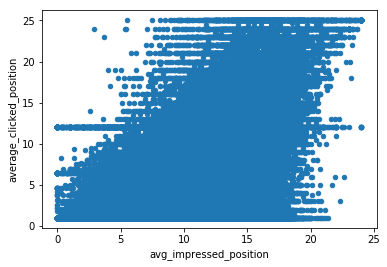

In [0]:
raw_data_part1_copy.plot.scatter(x='avg_impressed_position',
  y='average_clicked_position')

#### the plot shows some positive correlation which makes sense , off course items displayed on higher positions are more likely to be clicked than if they displayed on lower positions

#### we support this intuition by providing a 95% confidence interval for the correlation coeffecient between the 2 variables

#### we define the following function to help us building the confidence interval between the 2 factors


In [0]:
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n-3) 
    
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return  (z_to_r(lo), z_to_r(hi))

#### then we compute correlation coeffecient 

In [0]:
raw_data_part1_copy.loc[:,['avg_impressed_position','average_clicked_position']].corr()

,avg_impressed_position,average_clicked_position
avg_impressed_position,1.00000,0.53135
average_clicked_position,0.53135,1.00000


#### then we run a confidence interval for correlation coeffecient 

In [0]:
np.round((r_confidence_interval(0.53135,0.05,130056)),2)

array([0.53, 0.54])

#### so we are 95% confident that correlation coeffecient of avg_impressed_position	and average_clicked_position ranges between 53% and 54% indicating a positive moderate correlation

#### About the part of variance between them , let's calculate the covariance matrix

In [0]:
raw_data_part1_copy.loc[:,['avg_impressed_position','average_clicked_position']].cov()

,avg_impressed_position,average_clicked_position
avg_impressed_position,16.698047,11.416289
average_clicked_position,11.416289,27.645434


#### covariance between them is positive , this indicates that avg_impressed_position	and average_clicked_position tend to move in the same direction togeather

#### if we mean by variance between avg_impressed_position and 	average_clicked_position the difference of their magnitudes 

#### we can say that average displayed position is the mean position in which an item is displayed regardless it was clicked or not it measures how an item is displayed to the browser 

#### About average of clicked positions in which an item is clicked , we can say that it measure the best positions for this item to exist so they are more likely to be clicked , if we have a high CTR the two should be close to each other 

## Q4 : In the dataset, we provided you with the average displayed position. What can be wrong with using averages?

### Averages are generally a good measure if we deal date does not have data does not contain high vatisbility , since it may be affected by outliers, i.e in our example if we have an item impressed for 5 times in the following positions[1,2,3,1,18] the average is 5 that does not reflect the realiity , so in this cases better is to use median which is 2 in this case 

### generally median is better if we have outliers , it is more robust aganist them




# Part 2 – Session investigation

#### Now we import data

In [0]:
raw_data_part2 = pd.read_csv('tr_data_analysis_case_study_part2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### then we make a copy of the data to run our manipulations on

In [0]:
raw_data_part2_copy=raw_data_part2.copy()

## Q1 : Describe the data set that you have received. Calculate the 5 most frequent values per column (with frequency). Can you find any suspicious results? If so, what are they? And how would you fix these for the analysis?

#### then we check  how many NA values for each column

In [0]:
raw_data_part2_copy.isna().sum()

user_id                0
session_id             1
clicked_item_id        1
displayed_position     1
page_num               1
sort_order             1
search_type            1
path_id                1
arrival_days           1
departure_days         1
traffic_type           1
impressed_item_ids     1
dtype: int64

### We have a missing value for each column except user_id

### we check where are missing values for each column

In [0]:
raw_data_part2_copy.loc[raw_data_part2_copy['clicked_item_id'].isna()]

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
1903795,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### we see that it is only one row that has missing value for all columns except user_id thus it will not affect results to drop it from the data

In [0]:
raw_data_part2_copy=raw_data_part2_copy.drop(raw_data_part2_copy.loc[raw_data_part2_copy['displayed_position'].isna()].index)

In [0]:
len(raw_data_part2_copy)

1903795

#### then we just have a quick check on columns data types to make sure that each column is stored in an appropriate data type

In [0]:
raw_data_part2_copy.dtypes

user_id                 object
session_id             float64
clicked_item_id        float64
displayed_position     float64
page_num               float64
sort_order             float64
search_type            float64
path_id                float64
arrival_days           float64
departure_days         float64
traffic_type           float64
impressed_item_ids      object
dtype: object

#### We see that session_id , and clicked_item_id , are stored as float columns despite they should be strings

In [0]:
raw_data_part2_copy['clicked_item_id']=raw_data_part2_copy['clicked_item_id'].astype(int)

In [0]:
raw_data_part2_copy['clicked_item_id']=raw_data_part2_copy['clicked_item_id'].astype(str)

In [0]:
raw_data_part2_copy['session_id']=raw_data_part2_copy['session_id'].astype(str)

### Then we trasnfer to checking descriptive statistics for each columns and revise correctness and whether values of each column are logical or not

#### before descriptive statistics, , we use the option that displays float with 2 decimal places in pandas for better look for results

#### first we display the first 5 rows of the data as it is

In [0]:
pd.options.display.float_format = "{:.2f}".format

In [0]:
raw_data_part2_copy.head()

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
0,6216730024127027591,3.7556300552695163e+18,3390592,-11.00,0.00,12.00,2113.00,39693.00,3.00,4.00,2.00,128992;127920;132177;1107164;19389;3217646;123...
1,3540322805835307689,4.581411196117764e+18,2393900,6.00,0.00,21.00,2113.00,35009.00,21.00,22.00,2.00,5169438;997421;76994;1376364;67654;68977;23939...
2,5439210126639293380,7.260243962113139e+18,8285,0.00,0.00,12.00,2116.00,34390.00,301.00,302.00,2.00,8285;8284;78562;8243;1288434;61564;60293;15334...
3,3482625725900275142,3.013037030426146e+18,148308,6.00,0.00,41.00,2113.00,41579.00,39.00,42.00,3.00,2196706;46431;1262783;148312;1478421;6171546;1...
4,6185636196804664137,1.463578972675331e+18,4527530,0.00,0.00,12.00,2116.00,85724.00,48.00,49.00,2.00,4527530;149339;945921;1236133;1259540;1700445;...


#### here we find something weird , a negative value of for displayed position , let's check if there are negative values 

#### let's run describtion (descriptive statistics) for all float columns

In [0]:
raw_data_part2_copy.describe()

,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type
count,1903795.00,1903795.00,1903795.00,1903795.00,1903795.00,1903795.00,1903795.00,1903795.00
mean,4.26,0.27,103.11,2113.65,82240.41,57.41,-27533.61,2.10
std,7.72,1.10,134.26,1.53,124143.77,70.35,163811.41,0.45
min,-11.00,0.00,0.00,2100.00,0.00,-1.00,-1000000.00,1.00
25%,0.00,0.00,12.00,2113.00,38009.00,9.00,10.00,2.00
50%,2.00,0.00,12.00,2113.00,40606.00,27.00,27.00,2.00
75%,8.00,0.00,212.00,2115.00,46814.00,84.00,85.00,2.00
max,24.00,20.00,421.00,2116.00,680424.00,730.00,742.00,3.00


#### here we notice presence of negative values for 3 columns (displayed position , arrival_days , and departure days) 

#### We see also that we have maximum values for departure days and arrival days of more than 700 days, but this can be logical, a browser may view a hotel, and just think about visiting it after a long period, so this is not a problem.

#### we check the percentage of cases having arrival_days and cases having departure_days  more than 100

In [0]:
np.round((raw_data_part2_copy.loc[raw_data_part2_copy['arrival_days'] > 100]['arrival_days'].count()*100/len(raw_data_part2_copy)),2)

20.57

In [0]:
np.round((raw_data_part2_copy.loc[raw_data_part2_copy['departure_days'] > 100]['departure_days'].count()*100/len(raw_data_part2_copy)),2)

21.18

#### so about 20% of cases are above 100 days regarding arrival_days and departure_days so they can not be considered as wrong cases or outliers

#### let's check how many negative values(regardless how many times occured) for each of the 3 columns

In [0]:
raw_data_part2_copy['displayed_position'].drop_duplicates().sort_values(ascending=True).head()

0    -11.00
2      0.00
19     1.00
9      2.00
13     3.00
Name: displayed_position, dtype: float64

In [0]:
raw_data_part2_copy['arrival_days'].drop_duplicates().sort_values(ascending=True).head()

3946   -1.00
10      0.00
21      1.00
13      2.00
0       3.00
Name: arrival_days, dtype: float64

In [0]:
raw_data_part2_copy['departure_days'].drop_duplicates().sort_values(ascending=True).head()

28     -1000000.00
3946          0.00
10            1.00
21            2.00
19            3.00
Name: departure_days, dtype: float64

#### we notice that we have one negative value in the column 'displayed positions' which is '-11'

#### also one negative value for the column 'arrival_days' which is '-1'

#### also one negative value for the column 'departure_days' which is'-1000000.00'

#### then we run frequencies for  all columns , displaying the top five  frequent values per column (with frequency)

In [0]:
for i in raw_data_part2_copy.columns:
  print('top 5 frequent values for :' + i)
  print(raw_data_part2_copy[i].value_counts().head())
  print('')

top 5 frequent values for :user_id
4509866267912745159    549
3212529366726084995    373
9051529085815567256    332
8844433817516149751    272
6297403635493453063    219
Name: user_id, dtype: int64

top 5 frequent values for :session_id
5.009065438025538e+18    337
8.5605698441416e+18      148
2.839951425820838e+18    109
7.154740478512522e+18     92
3.191224920191539e+18     88
Name: session_id, dtype: int64

top 5 frequent values for :clicked_item_id
2834772    2869
1321090    2828
12624      2575
32940      2324
1455251    2297
Name: clicked_item_id, dtype: int64

top 5 frequent values for :displayed_position
0.00      495014
1.00      203090
-11.00    152437
2.00      138789
3.00      108490
Name: displayed_position, dtype: int64

top 5 frequent values for :page_num
0.00    1677391
1.00     124109
2.00      44578
3.00      21226
4.00      11857
Name: page_num, dtype: int64

top 5 frequent values for :sort_order
12.00     1162269
312.00     283516
212.00     229803
412.00      94343

#### We see that 'impressed_item_ids' not so nicely displayed in frequencies, so ,we store it as a list of impressed items for each click in a new column called 'impressions_per_click'

In [0]:
raw_data_part2_copy['impressions_per_click']  =pd.Series(raw_data_part2_copy.iloc[:,11].str.split(';'))

In [0]:
raw_data_part2_copy=raw_data_part2_copy.drop(columns=['impressed_item_ids '])

### From columns description, we know that :
### • Arrival_days: number of days from the date of the search and the date of the check- in. 
### • Departure_days: number of days from the date of the search and the date of the check-out. 

### Thus, we need to check whether in other cases (clicks) , that both 'arrival_days' and 'departure_days' have positive or zero values, we have always departure_days greater than or equal arrival_days

In [0]:
spent_days_raw=raw_data_part2_copy.loc[(raw_data_part2_copy['departure_days']>-1000000) & (raw_data_part2_copy['arrival_days']>-1)]['departure_days'] - raw_data_part2_copy.loc[(raw_data_part2_copy['departure_days']>-1000000) & (raw_data_part2_copy['arrival_days']>-1)]['arrival_days']

In [0]:
spent_days_raw.min()

1.0

#### thus we realize that departure_days greater than or equal arrival_days




### From the top 5 frequency we see a very dangerous result, the incorrect value'-11' is the third most frequent value in the column 'displayed_position' the same for the value '-1000000.0' in the column 'departure_days' so these values can affect badly the results

### in case of column 'displayed_position' it is more likely that the value '-11'  referring to missing or non correct value

### thus , to solve this issue , compute positions of eaach clicked items manually
### we see the clicked item and its order in ;impressed_item_ids' column , then inplace this order as displayed position of the clicked item

In [0]:
impressions_per_click=raw_data_part2_copy['impressions_per_click'] 

In [0]:
click_item_id=raw_data_part2_copy['clicked_item_id']

In [0]:
d=[]
for  i in range(len(click_item_id)) :
  f=impressions_per_click[i].index(click_item_id[i])
  d.append(f)

  
 
      

In [0]:
d[0:6]

[12, 6, 0, 6, 0, 0]

In [0]:
raw_data_part2_copy['displayed_position_correct']=d

#### then we add 1 to display position to make 1 apply to the first position and so on , to reflect the  real positions in the column

In [0]:
raw_data_part2_copy['displayed_position_correct']=raw_data_part2_copy['displayed_position_correct']+1

In [0]:
raw_data_part2_copy['displayed_position_correct'].value_counts().head()

1    538300
2    220850
3    150997
4    117847
5     97339
Name: displayed_position_correct, dtype: int64

#### so we remove the errornous column for better performance

---



In [0]:
raw_data_part2_copy=raw_data_part2_copy.drop(columns=['displayed_position'])

In [0]:
raw_data_part2_copy.head()

,user_id,session_id,clicked_item_id,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressions_per_click,displayed_position_correct
0,6216730024127027591,3.7556300552695163e+18,3390592,0.00,12.00,2113.00,39693.00,3.00,4.00,2.00,"[128992, 127920, 132177, 1107164, 19389, 32176...",13
1,3540322805835307689,4.581411196117764e+18,2393900,0.00,21.00,2113.00,35009.00,21.00,22.00,2.00,"[5169438, 997421, 76994, 1376364, 67654, 68977...",7
2,5439210126639293380,7.260243962113139e+18,8285,0.00,12.00,2116.00,34390.00,301.00,302.00,2.00,"[8285, 8284, 78562, 8243, 1288434, 61564, 6029...",1
3,3482625725900275142,3.013037030426146e+18,148308,0.00,41.00,2113.00,41579.00,39.00,42.00,3.00,"[2196706, 46431, 1262783, 148312, 1478421, 617...",7
4,6185636196804664137,1.463578972675331e+18,4527530,0.00,12.00,2116.00,85724.00,48.00,49.00,2.00,"[4527530, 149339, 945921, 1236133, 1259540, 17...",1


### regarding the column 'arrival_days' we think that the value '-1' had to be the value 1 referring that a user took one day after searching to check in

#### so we check if we can do the same (i.e take the absolute value for -1 as the correct value)

#### we take arrival_days and departure_days for the top 20 cases (clicks)in which arrival days=-1

In [0]:
raw_data_part2_copy.loc[raw_data_part2_copy['arrival_days']==-1,['arrival_days','departure_days']].head(20)

,arrival_days,departure_days
3946,-1.00,0.00
10395,-1.00,0.00
14196,-1.00,0.00
15360,-1.00,0.00
17950,-1.00,0.00
24471,-1.00,0.00
42822,-1.00,1.00
47009,-1.00,0.00
47235,-1.00,0.00
48273,-1.00,0.00


#### thus we see that if we take positive 1 we will have arrival_days greater than departure_days 

#### Actually from the above data we can conclude that the most likely that these -1 values had to be recorded as zeros

#### in a click like '58242' the user has arrival days of -1 and departure days of 1 this suggests that he arrived in the same day of clicking 

#### in other cases , we see arrival days of -1 , and departure days of 0 this indicates whether a user arrived and departed in the same day, or did not go 

#### in both cases , it is better to encode arrival  with zero

#### thus we replace -1 values in arrival days  with zeroes

In [0]:
raw_data_part2_copy['arrival_days_correct']=np.where(raw_data_part2_copy['arrival_days']>-1, raw_data_part2_copy['arrival_days'], 0)

In [0]:
raw_data_part2_copy['arrival_days_correct'].value_counts().head()

0.00    66159
3.00    63180
1.00    60910
4.00    54871
5.00    50279
Name: arrival_days_correct, dtype: int64

#### so we remove the errornous column for better performance

In [0]:
raw_data_part2_copy=raw_data_part2_copy.drop(columns=['arrival_days'])

In [0]:
raw_data_part2_copy.head()

,user_id,session_id,clicked_item_id,page_num,sort_order,search_type,path_id,departure_days,traffic_type,impressions_per_click,displayed_position_correct,arrival_days_correct
0,6216730024127027591,3.7556300552695163e+18,3390592,0.00,12.00,2113.00,39693.00,4.00,2.00,"[128992, 127920, 132177, 1107164, 19389, 32176...",13,3.00
1,3540322805835307689,4.581411196117764e+18,2393900,0.00,21.00,2113.00,35009.00,22.00,2.00,"[5169438, 997421, 76994, 1376364, 67654, 68977...",7,21.00
2,5439210126639293380,7.260243962113139e+18,8285,0.00,12.00,2116.00,34390.00,302.00,2.00,"[8285, 8284, 78562, 8243, 1288434, 61564, 6029...",1,301.00
3,3482625725900275142,3.013037030426146e+18,148308,0.00,41.00,2113.00,41579.00,42.00,3.00,"[2196706, 46431, 1262783, 148312, 1478421, 617...",7,39.00
4,6185636196804664137,1.463578972675331e+18,4527530,0.00,12.00,2116.00,85724.00,49.00,2.00,"[4527530, 149339, 945921, 1236133, 1259540, 17...",1,48.00


### now, we get to the most difficult, the value '-1000000' for departure days, i thinks this is recorded not to instead of positive values, off course no traveller will spend 1000000 days in a destination

### instead we think that when we find this value it indicates that value is missing(i.e number of days from the date of the search and the date of the check-out is not recorded)

### we suggest a method to inplace this value



#### First : we calculate number of days spent between check in and check out for users that have correct values for departure days (i.e != -1000000) and compute their average

In [0]:
spent_days=raw_data_part2_copy.loc[(raw_data_part2_copy['departure_days']>-1000000)]['departure_days'] - raw_data_part2_copy.loc[(raw_data_part2_copy['departure_days']>-1000000) ]['arrival_days_correct']

#### then , we get the average of days spent

In [0]:
average_spent_days=np.round((spent_days.mean()),0)

In [0]:
print(average_spent_days)

3.0


#### then we add average of days spent to the column arrival_days_correct to get an acceptable estimate for departure_days for cases (clicks) that have 'departure_days'==-1000000

In [0]:
raw_data_part2_copy['departure_days_correct'] = np.where(raw_data_part2_copy['departure_days']>-1000000, raw_data_part2_copy['departure_days'], raw_data_part2_copy['arrival_days_correct']+3)


#### just make sure that of the solution's result

In [0]:
raw_data_part2_copy.loc[raw_data_part2_copy['departure_days']==-1000000 , ['departure_days','departure_days_correct','arrival_days_correct']].head(10)

,departure_days,departure_days_correct,arrival_days_correct
28,-1000000.00,56.00,53.00
80,-1000000.00,3.00,0.00
115,-1000000.00,5.00,2.00
117,-1000000.00,4.00,1.00
139,-1000000.00,32.00,29.00
152,-1000000.00,17.00,14.00
166,-1000000.00,21.00,18.00
359,-1000000.00,13.00,10.00
380,-1000000.00,60.00,57.00
392,-1000000.00,14.00,11.00


In [0]:
raw_data_part2_copy['departure_days_correct'].drop_duplicates().sort_values(ascending=True).head()

3946   0.00
10     1.00
21     2.00
19     3.00
0      4.00
Name: departure_days_correct, dtype: float64

#### so, no more '-1000000' in 'departure_days_correct'

#### now we check the top 5  frequent values in the new column of  'departure_days_correct'

In [0]:
raw_data_part2_copy['departure_days_correct'].value_counts().head()

4.00    61214
5.00    53267
1.00    52780
6.00    50661
7.00    46318
Name: departure_days_correct, dtype: int64

 #### so we remove the errornous column for better performance

In [0]:
raw_data_part2_copy=raw_data_part2_copy.drop(columns=['departure_days'])

In [0]:
raw_data_part2_copy.head()

,user_id,session_id,clicked_item_id,page_num,sort_order,search_type,path_id,traffic_type,impressions_per_click,displayed_position_correct,arrival_days_correct,departure_days_correct
0,6216730024127027591,3.7556300552695163e+18,3390592,0.00,12.00,2113.00,39693.00,2.00,"[128992, 127920, 132177, 1107164, 19389, 32176...",13,3.00,4.00
1,3540322805835307689,4.581411196117764e+18,2393900,0.00,21.00,2113.00,35009.00,2.00,"[5169438, 997421, 76994, 1376364, 67654, 68977...",7,21.00,22.00
2,5439210126639293380,7.260243962113139e+18,8285,0.00,12.00,2116.00,34390.00,2.00,"[8285, 8284, 78562, 8243, 1288434, 61564, 6029...",1,301.00,302.00
3,3482625725900275142,3.013037030426146e+18,148308,0.00,41.00,2113.00,41579.00,3.00,"[2196706, 46431, 1262783, 148312, 1478421, 617...",7,39.00,42.00
4,6185636196804664137,1.463578972675331e+18,4527530,0.00,12.00,2116.00,85724.00,2.00,"[4527530, 149339, 945921, 1236133, 1259540, 17...",1,48.00,49.00


### Another final check, we see from column description that 'departure_days' must be greater than or equal 'arrival_days' thus if arrival days column is greater we have a problem

In [0]:
raw_data_part2_copy.loc[ (raw_data_part2_copy['departure_days_correct'] < raw_data_part2_copy['arrival_days_correct']) ]

,user_id,session_id,clicked_item_id,page_num,sort_order,search_type,path_id,traffic_type,impressions_per_click,displayed_position_correct,arrival_days_correct,departure_days_correct


#### No cases (clicks) have departure_days_correct less than arrival_days_correct thus we can state that we solved all data cleaning issues

### So finally we have our data raw_data_part2_copy cleaned and ready for analysis and answering the other questions

## Q2 : Which search type has the lowest average displayed position? What is the best sorting order for this search type? Which search type should be excluded for a statistical reason?

### we calculate average displayed position per search type

In [0]:
average_displayed_position_per_search_type=raw_data_part2_copy.pivot_table(index='search_type', values='displayed_position_correct' , aggfunc=np.mean )

In [0]:
average_displayed_position_per_search_type.columns=['average_displayed_position']

In [0]:
average_displayed_position_per_search_type

,average_displayed_position
search_type,
2100.00,3.50
2111.00,8.28
2113.00,7.27
2114.00,6.09
2115.00,7.76
2116.00,3.45


#### we find that the search_type that has the label '2100' it has the lowest average displayed position, depending on that criterion , its sorting order should be the last 

#### but let's check another criterion, which is its frequency od each search type in the data

In [0]:
raw_data_part2_copy['search_type'].value_counts()

2113.00    928598
2116.00    375583
2111.00    230316
2115.00    194310
2114.00    174986
2100.00         2
Name: search_type, dtype: int64

#### this supports that the best sorting order for the search type labeled by '2100' is the last

### regarding the search type that should be excluded for a statistical reason, it is the same label '2100' since it occured in only 2 cases (clicks)  so such a sample is non representative for properties of this type unlike other search types that are more popular in the data

## Q3 : What are the top 10 “best” and “worst” performing items? Explain what metric you have chosen to evaluate the performance and why. 

### in this case we need to compute some item based statistics like (number of impressions, number of clicks , average impressed position)

#### First we calculate number of impressions per item


#### for this purpose  we need to move on the level of items, count how many times it was impressed and in which positions

#### we take the items in the column 'impressed_item_ids' for the whole 1903795 cases (clicks) transferring impressed items each click into a list to ease processing them

In [0]:
impressions_per_click=impressions_per_click=raw_data_part2_copy['impressions_per_click'] 

In [0]:
impressions_per_click.head()

0    [128992, 127920, 132177, 1107164, 19389, 32176...
1    [5169438, 997421, 76994, 1376364, 67654, 68977...
2    [8285, 8284, 78562, 8243, 1288434, 61564, 6029...
3    [2196706, 46431, 1262783, 148312, 1478421, 617...
4    [4527530, 149339, 945921, 1236133, 1259540, 17...
Name: impressions_per_click, dtype: object

In [0]:
len (impressions_per_click)

1903795

#### then we count how many each item impressed in the 1903795 clicks 

#### but , we will need to have average impressed position for each item in the next question, so in the following loop, we will extract each impressed item and its position

In [0]:
  d=[]   
  for a in impressions_per_click:
    

    for i,j in enumerate(a):
           d.append((j,i))

#### then we merge all items and position in a dataset

In [0]:
 position_for_each_item = pd.DataFrame(d,columns=['item','position'])

In [0]:
position_for_each_item.head()

,item,position
0,128992,0
1,127920,1
2,132177,2
3,1107164,3
4,19389,4


#### since we know that the first position is denoted as 0 thus we add 1 to position

In [0]:
position_for_each_item['position']=position_for_each_item['position']+1

In [0]:
position_for_each_item.head()

,item,position
0,128992,1
1,127920,2
2,132177,3
3,1107164,4
4,19389,5


#### then we count how many each item impressed in the 1903795 lists of impressed items into one list

In [0]:
impressions_per_item = pd.DataFrame(pd.Series(position_for_each_item['item'].value_counts()))

In [0]:
impressions_per_item.columns=['impressions']

In [0]:
impressions_per_item.index.name='item'

In [0]:
impressions_per_item.head()

,impressions
item,
1321090,40142
47121,29460
12594,21297
3218556,20701
880913,20554


In [0]:
impressions_per_item.dtypes

impressions    int64
dtype: object

#### we run a quick check that we calculated number of impressions per item correctly

#### returning to the list that represents the impressed items for each click we calculate the total number of impressions for all clicks

In [0]:
b=[]
for i in impressions_per_click:
   b.append(len(i))

In [0]:
pd.Series(b).sum()

43783426

#### if we calculated the total number of impressions per item we should get the same number 

In [0]:
impressions_per_item['impressions'].sum()

43783426

#### then we  calculate the total clicks per item

In [0]:
total_clicks_per_item=pd.DataFrame(raw_data_part2_copy['clicked_item_id'].value_counts())

In [0]:
total_clicks_per_item.columns=['clicks']

In [0]:
total_clicks_per_item.index.name='item'

In [0]:
total_clicks_per_item.head()

,clicks
item,
2834772,2869
1321090,2828
12624,2575
32940,2324
1455251,2297


#### let's make a check, if we extracted clicks correctly, the sum of clicks per item should equal the number of sessions

In [0]:
total_clicks_per_item['clicks'].sum()

1903795

#### thus, we are sure about extracting clicks per item correctly

#### Then we merge number of clicks per item to number of impressions in one new table

In [0]:
click_impression_item=impressions_per_item.merge(total_clicks_per_item, left_on='item', right_on='item')

In [0]:
click_impression_item.head()

,impressions,clicks
item,,
1321090,40142,2828
47121,29460,1313
12594,21297,2244
3218556,20701,756
880913,20554,578


#### the direct choice to compare performance of is clicks , but it may not be fair since an item may be clicked 10 times of 20 impressions and another may be clicked 8 times but of 10 impressed times, so it is much more fair to take the 10 most successful items as per click through rate (CTR) as we may conclude from the following link

https://www.en.advertisercommunity.com/t5/Performance-Optimization/Overall-Clicks-VS-CTR/td-p/344706


#### click through rate can be described as the ratio of ad clicks to impressions

#### the most common choice to the criteria to compare between is click through rate , so we calculate it as follows

In [0]:
click_impression_item['CTR']=np.round((click_impression_item['clicks']*100/click_impression_item['impressions']),2)

#### thus we take the best 10 items based on (CTR)

In [0]:
click_impression_item.sort_values(by=['CTR'], ascending=False).head(10)

,impressions,clicks,CTR
item,,,
2180910,1,1,100.00
502771,1,1,100.00
77030,1,1,100.00
1605275,1,1,100.00
45977,1,1,100.00
1261953,1,1,100.00
6469312,1,1,100.00
2881368,1,1,100.00
2381994,1,1,100.00


#### We notice that this is not fair, both of them was impressed for an only one time and was clicked that time 

####

#### we suggest that we take the top 10 items as per CTR of the 1000 most viewed items

In [0]:
click_impression_item.sort_values(by=['impressions'], ascending=False).head(1000).sort_values(by=['CTR'], ascending=False).head(10)

,impressions,clicks,CTR
item,,,
19768,5747,1383,24.06
19539,5190,1106,21.31
32940,11883,2324,19.56
2834772,14885,2869,19.27
8928,8302,1553,18.71
672466,9251,1695,18.32
37165,7676,1382,18.00
3953294,5945,1041,17.51
19599,10230,1785,17.45


#### to take the worst 10 items as per CTR 

In [0]:
click_impression_item.sort_values(by=['CTR'], ascending=True).head(10)

,impressions,clicks,CTR
item,,,
6338080,907,1,0.11
920327,914,1,0.11
634266,903,1,0.11
3223133,899,1,0.11
4060868,833,1,0.12
6361592,842,1,0.12
967099,845,1,0.12
1485095,774,1,0.13
1997203,777,1,0.13


## Q4 : Describe and visualise the relationship between the average displayed position and the CTR among the top 1000 most clicked items.

### We return back to the table 'position_for_each_item' to calculate average impressed position for each item (remember that we added one to each position since , as we know, python codes 0 as first position)

In [0]:
average_displayed_position_per_item=position_for_each_item.pivot_table(index='item', values='position' , aggfunc=np.mean)

In [0]:
average_displayed_position_per_item.index.name='item'

In [0]:
average_displayed_position_per_item.columns=['average_impressed_position']

#### Thus we calculated average impressed position per item

In [0]:
average_displayed_position_per_item.head()

,average_impressed_position
item,
100000,15.76
1000001,17.24
1000005,16.43
1000007,15.00
100001,11.43


#### then we merge the calculated average impressed position to the data contain clicks, positions, and CTR of each item to answer this question

In [0]:
click_impression_item_adisplay=click_impression_item.merge(average_displayed_position_per_item, left_on='item', right_on='item')

In [0]:
click_impression_item_adisplay.head()

,impressions,clicks,CTR,average_impressed_position
item,,,,
1321090,40142,2828,7.04,7.91
47121,29460,1313,4.46,9.91
12594,21297,2244,10.54,7.26
3218556,20701,756,3.65,12.83
880913,20554,578,2.81,11.71


#### First we perform scatterplot for CTR and average impressed position for the most 1000 impressed items

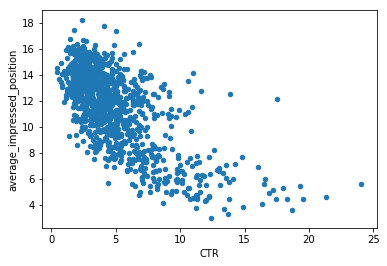

In [0]:
click_impression_item_adisplay.sort_values(by=['impressions'], ascending=False).head(1000).plot.scatter(x='CTR',
  y='average_impressed_position')

#### it is clear that there is a negative relationship between CTR and average impressed position for the 1000 most impressed items, this may make sence because browser does not tend to choose the very first options he seeks the most convenient  option with the least possible price

#### to support this intuition numerically, let's build a confidence interval for correlation between the two indicators for the top 1000 impressed items

In [0]:
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n-3) 
    
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return  (z_to_r(lo), z_to_r(hi))

In [0]:
click_impression_item_adisplay.sort_values(by=['impressions'], ascending=False).head(1000).loc[:,['CTR','average_impressed_position']].corr()

,CTR,average_impressed_position
CTR,1.00,-0.69
average_impressed_position,-0.69,1.00


In [0]:
np.round((r_confidence_interval(-0.69,0.05,1000)),2)

array([-0.72, -0.66])

#### From the above confidence interval, we can state that we are confident by 95% that pearson correlation coeffecient between CTR and average_impressed_position for the most impressed 1000 items ranges between [-0.72, -0.66] indicating that for the  most impressed 1000 items we have strong negative correlation 

#### this results supports intuition we developed from the plot there is a negative relationship between CTR and average impressed position for these items